In [37]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [38]:
pip install ISLP

In [39]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [40]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Question 13 This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.



## (a)Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [7]:
Weekly = load_data('Weekly')

In [6]:
Weekly.size

9801

In [8]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [9]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [10]:
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [15]:
temp = Weekly.copy()
tmp = temp.drop(['Direction'], axis = 1)
tmp

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178
...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034


In [16]:
tmp.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


### Patern - Numerical

There seems to be a pattern between Volume and Year. We see it has a high correlation at 0.842.

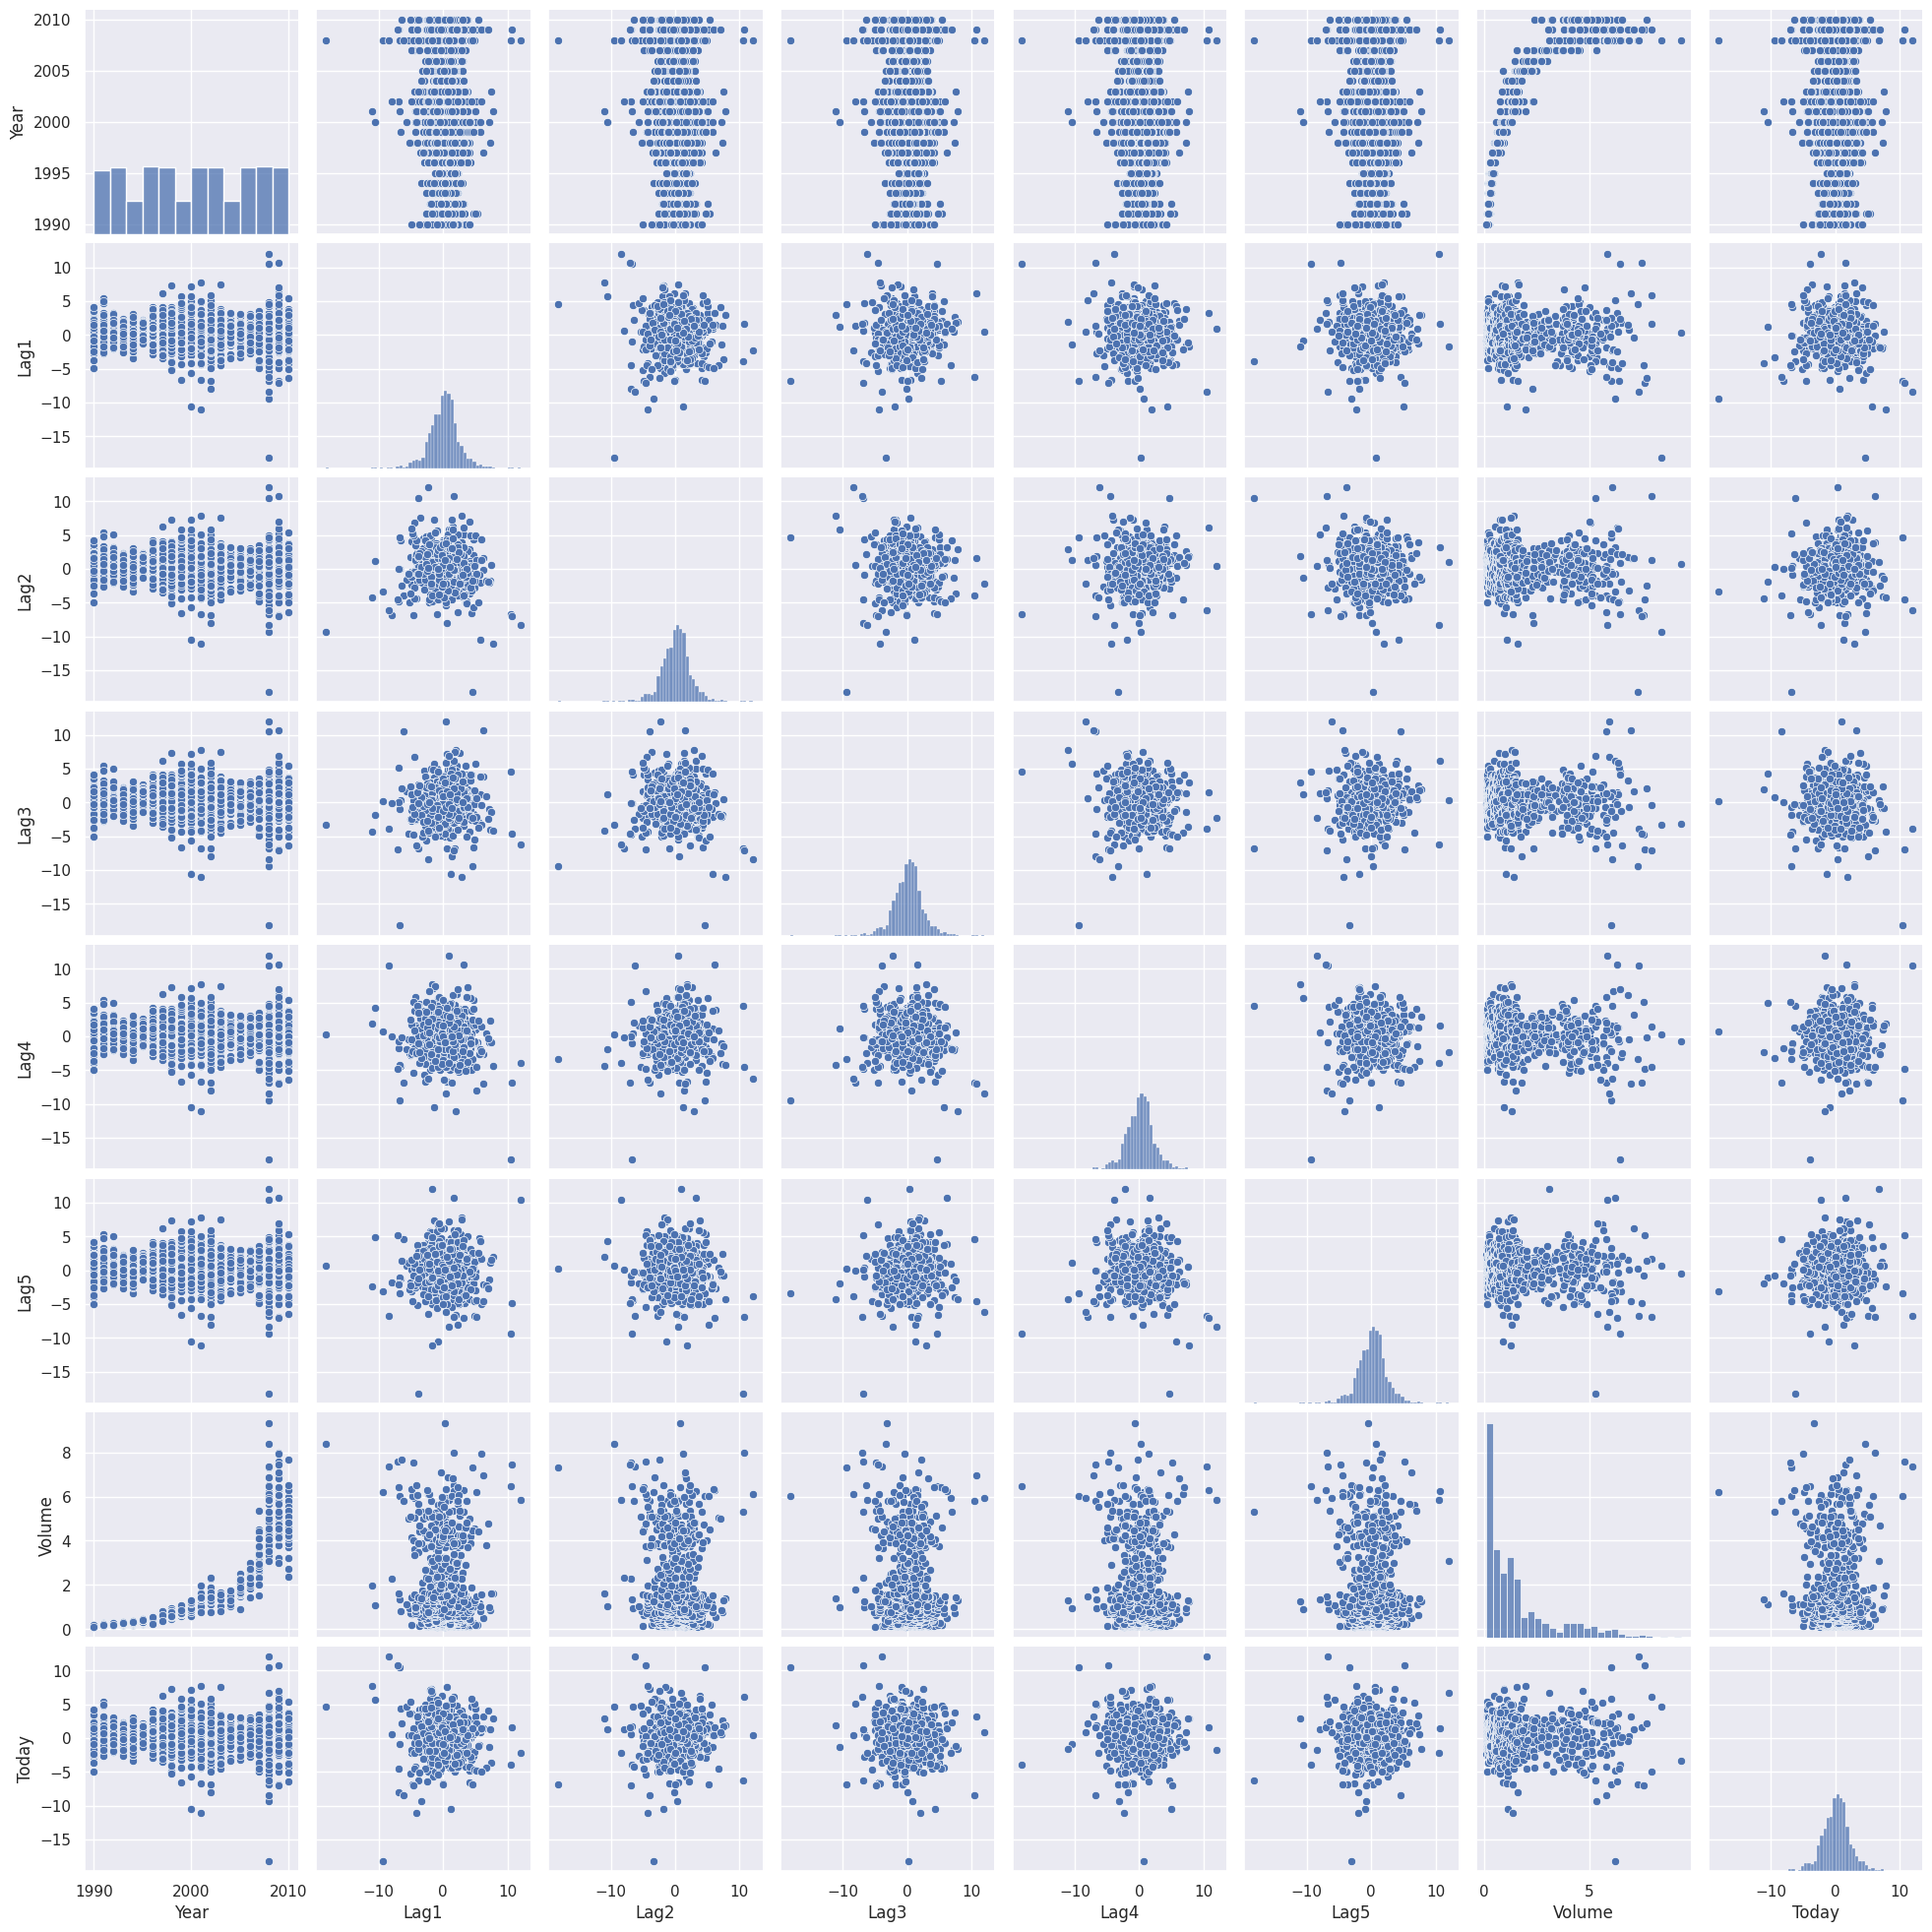

In [17]:
sns.pairplot(tmp)

### Patern - Graph

We see an $X^{2}$ correlation with Volume and Year, which we predicted there was a relationship with the data.

There might also be a relationship between everything and year. It seems constant as the years go on there is roughly the same amount of stock market returns.

## (b) - Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [19]:
allvars = Weekly.columns.drop(['Year', 'Today', 'Direction'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'

In [20]:
glm = sm.GLM(y,X, family = sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Tue, 18 Jun 2024   Deviance:                       1486.4
Time:                        22:02:22   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

### Results

We can see the only significant p value would be Lag2. It is the only one below 0.05.

## (c) -  Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [24]:
probs = results.predict()
probs


array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163])

In [22]:
Weekly.Direction.shape

(1089,)

In [25]:
labels = np.array(['Down'] * 1089)
labels[probs >0.5] = "Up"


In [26]:
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


### Results - Confusion Matrix

We predicted that the market would go up 557 correctly and 430 times incorrectly. So 557/ (430 + 557) = 56.4 %.

Total of 557 + 48 Up values = 605

Total of 54 + 430 Down values = 484

Total Predicted up Values = 987

Total Predicted down Values = 102

Data Prediction for Up 605/ (605 + 484) = 55.55 % baseline

Data Correction for all prediction (557 + 54) / (605 + 484) = 56.1 %

Data Correct Down Prediction 484 /(605 + 484) = 44.44 baseline

Data guessing for up prediction = 557 / 605 = 90.5 %

Data guessing for down prediction = 54 / 484 = 11.5 %



### Results - understanding

We see the overall prediction for our model is 56.1 %. It is not much better than the 55.55 % baseline if we just gussed 'up' for everything.

Next we see we rarely correctly predict 'down' as it is 11.5 %.

However we over predict up at 90.5 % accurate. So our model has several problems.

## (d) -Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [8]:
Weekly.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [13]:
Weekly.Year.min()

1990

In [14]:
Weekly.Year.max()

2010

In [41]:
train = Weekly[Weekly['Year'] <= 2008]
test = Weekly[Weekly['Year'] > 2008]

X_train, y_train = train['Lag2'], train['Direction']
X_test, y_test = test['Lag2'], test['Direction']

In [20]:
lr = LogisticRegression()
lr.fit(X_train.to_frame(), y_train)

LogisticRegression()

In [24]:
print(X_test.shape)
probs = lr.predict(X_test.to_frame())
probs

(104,)


array(['Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype=object)

In [25]:
probs = lr.predict(X_test.to_frame())
confusion_table(probs, y_test)


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


## Results - Confusion Table

Total Accuracy : 56 + 9 / (56 + 9 + 34 + 5) = .625

Baseline Accuracy: 61 /(56 + 9 + 34 + 5) = .5865

Prediction Accuracy for Up : 56 / 61 = .918

Prediction Accuracy for Down: 9/ 43 = .209

## Results - Explained

We can see our Total Accuracy rose but so did our baseline accuracy. We are at a 4 % increase which is better than 1 % from using all the data.

Our up prediction went slightly up by 1 % and our down percentage went up by almost 10 %.

Overall, this is a more accurate model but it is still inaccurate.

## (e) - Repeat (d) using LDA.

In [29]:
lda = LDA()
lda.fit(X_train.to_frame(),y_train)

LinearDiscriminantAnalysis()

In [31]:
probs = lda.predict(X_test.to_frame())
confusion_table(probs, y_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


### Results - Confusion Matrix

It is the same table as before so there isn't a difference between logistic regression and LDA


## (f) - Repeat using QDA

In [32]:
qda = QDA()
qda.fit(X_train.to_frame(), y_train)

QuadraticDiscriminantAnalysis()

In [36]:
pred = qda.predict(X_test.to_frame())
confusion_table(pred, y_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


### Results - Confusion Matrix

Total Accuracy of the Table = 61/ 104 = .5865

Baseline Accuracy  = 61 / 104 = .5865



### Results - Explained

There isn't a different between the baseline and the accuracy of the table so QDA is not a reliable estimation. LDA and logistic regression are the best so far

## (g) - Repeat using KNN with n = 1

In [42]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train.to_frame(), y_train)


KNeighborsClassifier(n_neighbors=1)

In [43]:
pred = knn_1.predict(X_test.to_frame())
confusion_table(pred, y_test)

Truth,Down,Up
Predicted,,
Down,22,32
Up,21,29


### Results - Confusion Table

Total Correct Predictions = 41/ 41 + 32 + 21 = 48.8%

Total Baseline Predictions = 61 / 61+ 22 + 21 = 58.65 %

### Results - Described

We can say that the baseline prediction is way higher so this isn't a great method.

## (h) Repeat (d) with niave bayes


In [45]:
NB = GaussianNB()
NB.fit(X_train.to_frame(), y_train)

GaussianNB()

In [46]:
preds = NB.predict(X_test.to_frame())
confusion_table(preds, y_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


### Results - Confusion Table

This is the exact same results as QDA which wasn't a great fit

## (i) Which of these methods appears to provide the best results on this data?

The best results occurred from logistic regression and LDA. These both had the exact same results around 4 % better than the baseline.

The parametric methods like QDA, KNN, and bayes did not perform well. They were either the exact same as the baseline or worse than the baseline

## (j) Experiment with diferent combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifer.

In [49]:
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train.to_frame(), y_train)
  pred = knn.predict(X_test.to_frame())
  print(confusion_table(pred, y_test))


Truth      Down  Up
Predicted          
Down         22  32
Up           21  29
Truth      Down  Up
Predicted          
Down         31  44
Up           12  17
Truth      Down  Up
Predicted          
Down         16  19
Up           27  42
Truth      Down  Up
Predicted          
Down         26  27
Up           17  34
Truth      Down  Up
Predicted          
Down         16  21
Up           27  40
Truth      Down  Up
Predicted          
Down         20  28
Up           23  33
Truth      Down  Up
Predicted          
Down         16  20
Up           27  41
Truth      Down  Up
Predicted          
Down         21  25
Up           22  36
Truth      Down  Up
Predicted          
Down         17  20
Up           26  41


### Results - KNN

The best result is for k_neighbors = 3. This has a prediction rate of 40 correct, which is the highest!